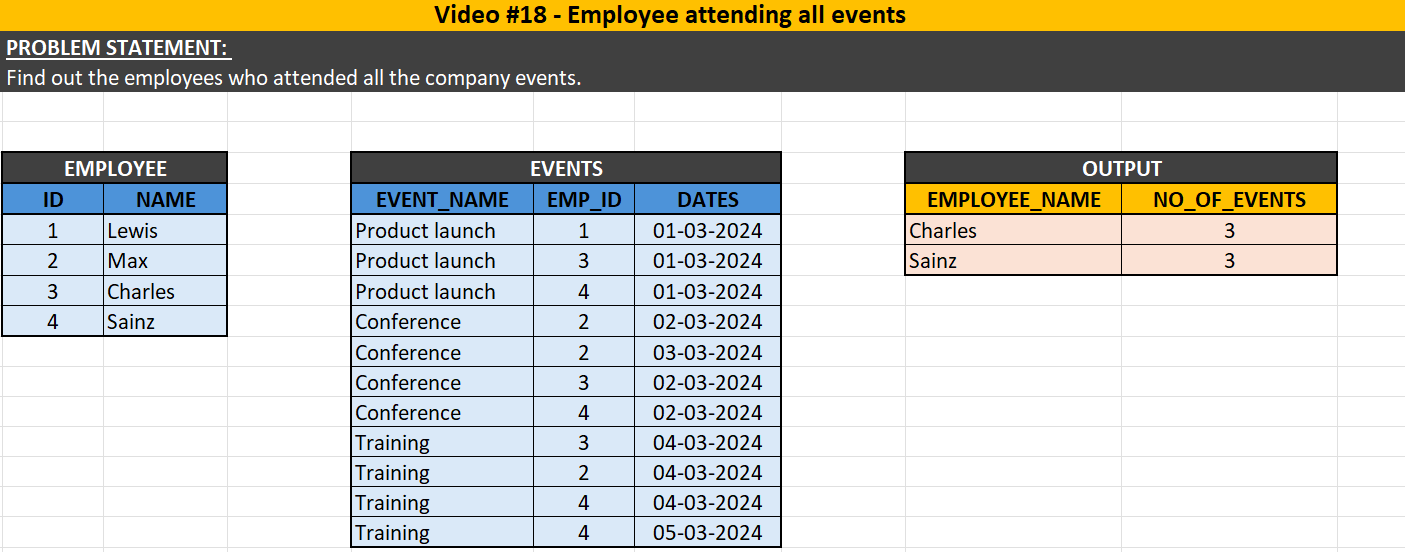


In [17]:
import pandas as pd

# List of events with EMP_ID and DATES
events = [
    {"EVENT_NAME": "Product launch", "EMP_ID": 1, "DATES": "01-03-2024"},
    {"EVENT_NAME": "Product launch", "EMP_ID": 3, "DATES": "01-03-2024"},
    {"EVENT_NAME": "Product launch", "EMP_ID": 4, "DATES": "01-03-2024"},
    {"EVENT_NAME": "Conference", "EMP_ID": 2, "DATES": "02-03-2024"},
    {"EVENT_NAME": "Conference", "EMP_ID": 2, "DATES": "03-03-2024"},
    {"EVENT_NAME": "Conference", "EMP_ID": 3, "DATES": "02-03-2024"},
    {"EVENT_NAME": "Conference", "EMP_ID": 4, "DATES": "02-03-2024"},
    {"EVENT_NAME": "Training", "EMP_ID": 3, "DATES": "04-03-2024"},
    {"EVENT_NAME": "Training", "EMP_ID": 2, "DATES": "04-03-2024"},
    {"EVENT_NAME": "Training", "EMP_ID": 4, "DATES": "04-03-2024"},
    {"EVENT_NAME": "Training", "EMP_ID": 4, "DATES": "05-03-2024"},
]

# Convert list of dictionaries into DataFrame
df_events = pd.DataFrame(events)

# Convert the DATES column to datetime format
df_events['DATES'] = pd.to_datetime(df_events['DATES'], format='%d-%m-%Y')

df_events.drop_duplicates(subset=["EVENT_NAME","EMP_ID"],inplace=True)

# Print the resulting DataFrame
print(df_events)


       EVENT_NAME  EMP_ID      DATES
0  Product launch       1 2024-03-01
1  Product launch       3 2024-03-01
2  Product launch       4 2024-03-01
3      Conference       2 2024-03-02
5      Conference       3 2024-03-02
6      Conference       4 2024-03-02
7        Training       3 2024-03-04
8        Training       2 2024-03-04
9        Training       4 2024-03-04


In [18]:
df_events=df_events[["EVENT_NAME","EMP_ID"]]
df_events

,EVENT_NAME,EMP_ID
0,Product launch,1
1,Product launch,3
2,Product launch,4
3,Conference,2
5,Conference,3
6,Conference,4
7,Training,3
8,Training,2
9,Training,4


In [19]:
result = df_events.groupby(["EMP_ID"]).agg(
    NO_OF_EVENTS = ("EVENT_NAME", 'count')
).reset_index()
result

,EMP_ID,NO_OF_EVENTS
0,1,1
1,2,2
2,3,3
3,4,3


In [20]:
import pandas as pd

# List of employee data
employees = [
    {"EMP_ID": 1, "NAME": "Lewis"},
    {"EMP_ID": 2, "NAME": "Max"},
    {"EMP_ID": 3, "NAME": "Charles"},
    {"EMP_ID": 4, "NAME": "Sainz"}
]

# Convert list of dictionaries into DataFrame
df_employees = pd.DataFrame(employees)

# Print the resulting DataFrame
print(df_employees)


   EMP_ID     NAME
0       1    Lewis
1       2      Max
2       3  Charles
3       4    Sainz


In [21]:
final = pd.merge(df_employees,result, on="EMP_ID", how="inner")
final[final["NO_OF_EVENTS"]==3][["EMP_ID", "NAME", "NO_OF_EVENTS"]]

,EMP_ID,NAME,NO_OF_EVENTS
2,3,Charles,3
3,4,Sainz,3
